In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from matplotlib import pyplot as plt

In [6]:
# Import the data
data = pd.read_csv('./merged')

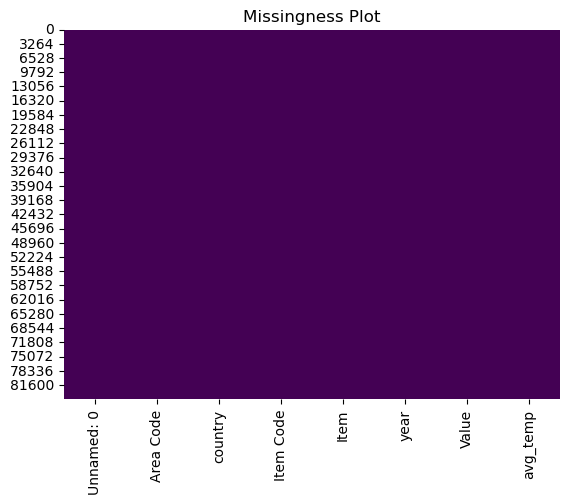

In [9]:
# Check for NAs in the merged dataset
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missingness Plot')
plt.show()

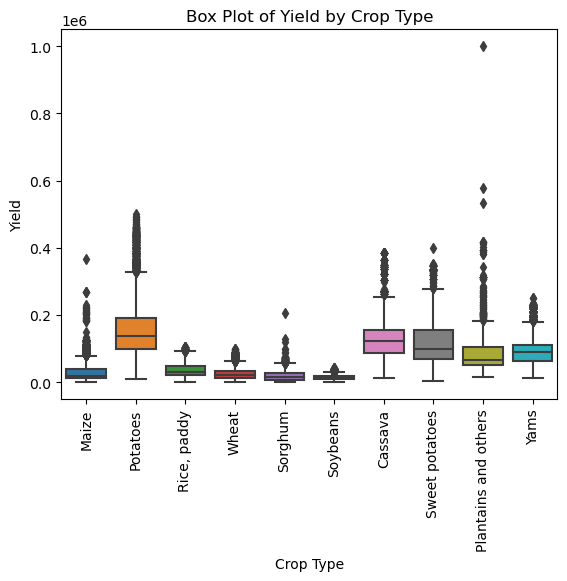

In [10]:
# Create Box plot of yield by crop type
sns.boxplot(data=data, x='Item', y='Value')
plt.xticks(rotation=90)
plt.title('Box Plot of Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield')
plt.show()

/var/folders/rq/7pwt77hx3kbgj_gczszvplch0000gn/T/ipykernel_87846/2122675899.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


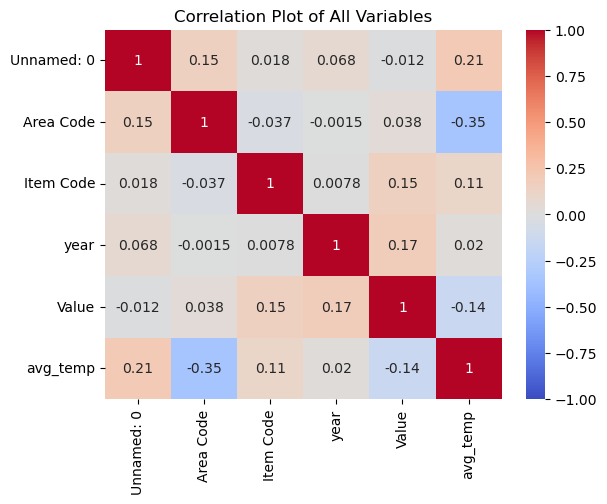

In [11]:
# Plot correlation plot of all numerical variables
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot of All Variables')
plt.show()

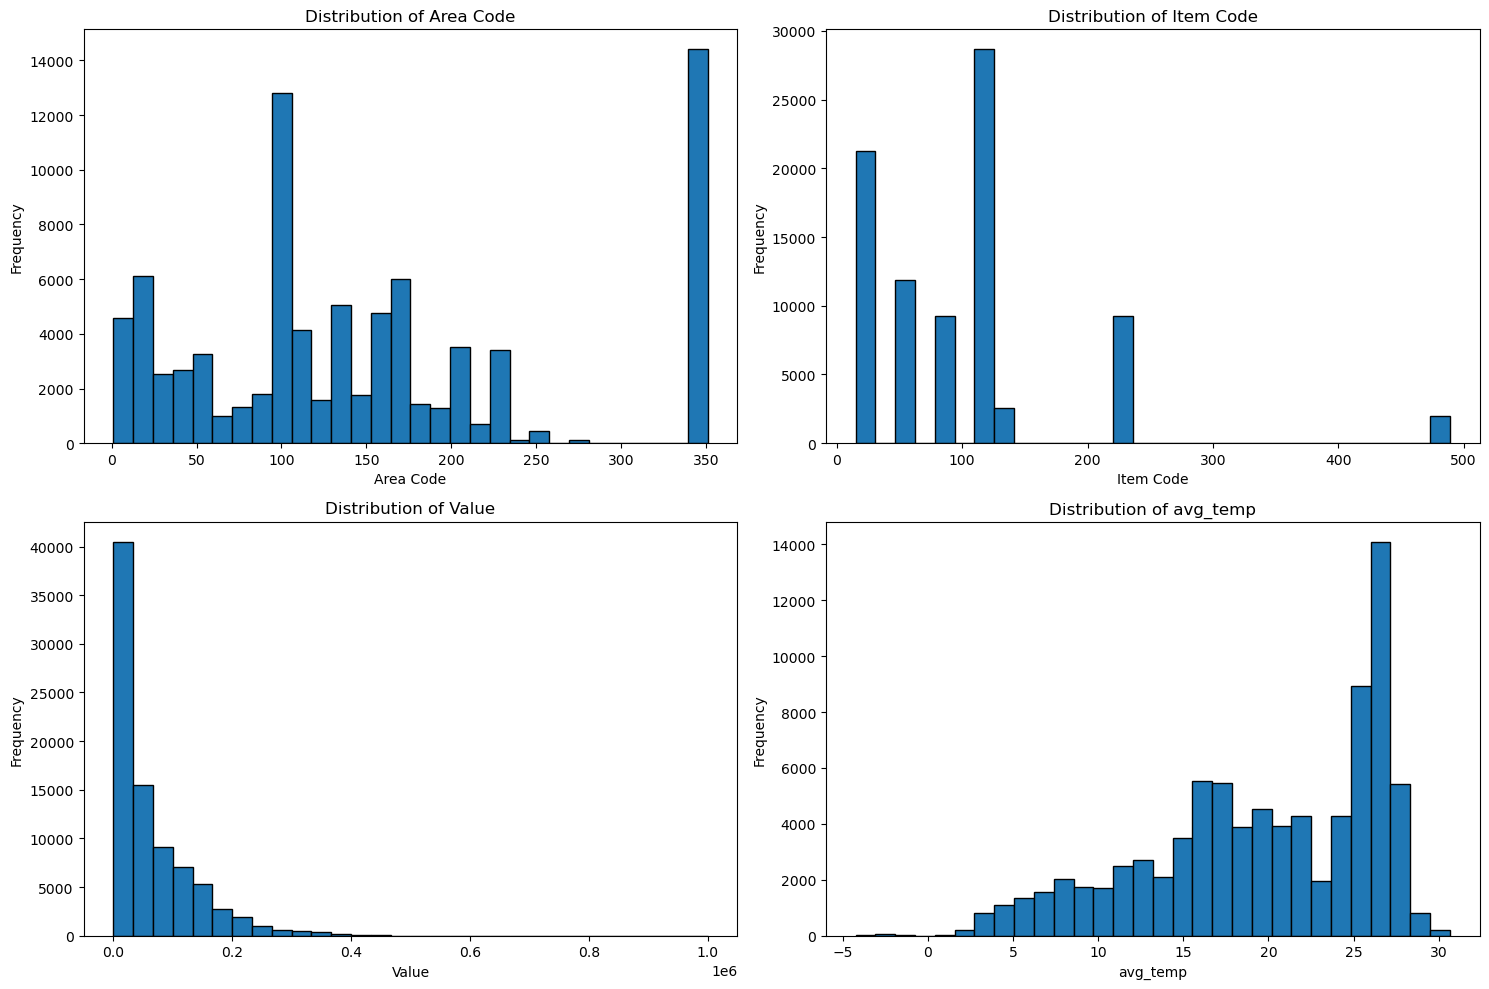

In [22]:
# Plot the histograms for distribution of each numerical variable
numerical_columns = data.select_dtypes(include='number').columns
numerical_columns = [col for col in numerical_columns if col not in ['year', 'Unnamed: 0']]

num_columns = 2
num_rows = 2

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.hist(data[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
# Histograms to top 10 yield nations
year_2013_data = data[data['year'] == 2013]
yield_per_country_2013 = year_2013_data.groupby('country')['Value'].sum()

top_10_countries_2013 = yield_per_country_2013.nlargest(10).index
top_10_data = data[data['country'].isin(top_10_countries_2013)]

year_selector = widgets.IntSlider(
    value=2013,
    min=data['year'].min(),
    max=data['year'].max(),
    step=1,
    description='Year',
    continuous_update=False
)

def plot_yield_by_country(selected_year):
    year_data = top_10_data[top_10_data['year'] == selected_year]
    yield_per_country = year_data.groupby('country')['Value'].sum()
    
    plt.figure(figsize=(10, 6))
    yield_per_country.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Yield for Top 10 Countries in {selected_year}')
    plt.xlabel('Country')
    plt.ylabel('Yield')
    plt.xticks(rotation=45)
    plt.show()

interactive_plot = widgets.interactive_output(plot_yield_by_country, {'selected_year': year_selector})
display(year_selector, interactive_plot)

IntSlider(value=2013, continuous_update=False, description='Year', max=2013, min=1961)

Output()